In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="whitegrid",palette='pastel')

In [2]:
columns = ['is_booking','is_mobile','is_package','user_location_country',
           'hotel_cluster','posa_continent','hotel_continent','channel',
           'srch_ci_mm','srch_ppl_cnt']

train_data = pd.read_csv('data/train_clean_mod.csv', delimiter=',',usecols=columns)

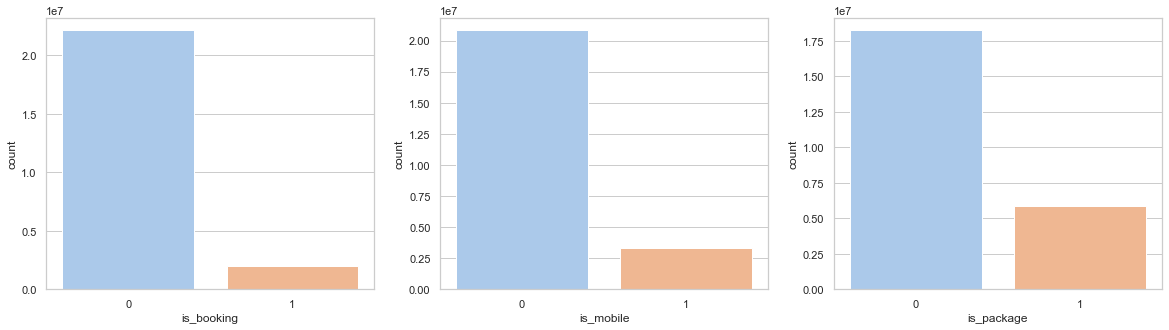

In [3]:
fig, ((axis1,axis2,axis3)) = plt.subplots(1,3,figsize=(20,5))

sns.countplot(train_data['is_booking'],ax=axis1)
sns.countplot(train_data['is_mobile'],ax=axis2)
sns.countplot(train_data['is_package'],ax=axis3)

plt.savefig('plots/is_booking_mobile_package.jpg')

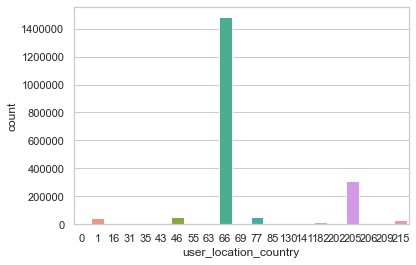

In [4]:
sns.countplot('user_location_country', data = train_data[train_data['is_booking']==1])
plt.savefig('plots/booked_user_location_country.jpg')

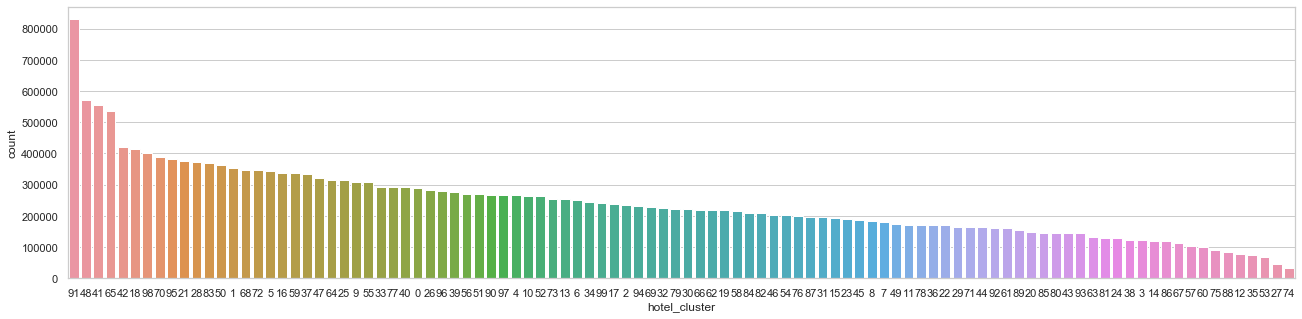

In [5]:
plt.figure(figsize=(22,5))

sns.countplot(train_data["hotel_cluster"],order=train_data["hotel_cluster"].value_counts().index)
plt.savefig('plots/hotel_cluster_count.jpg')

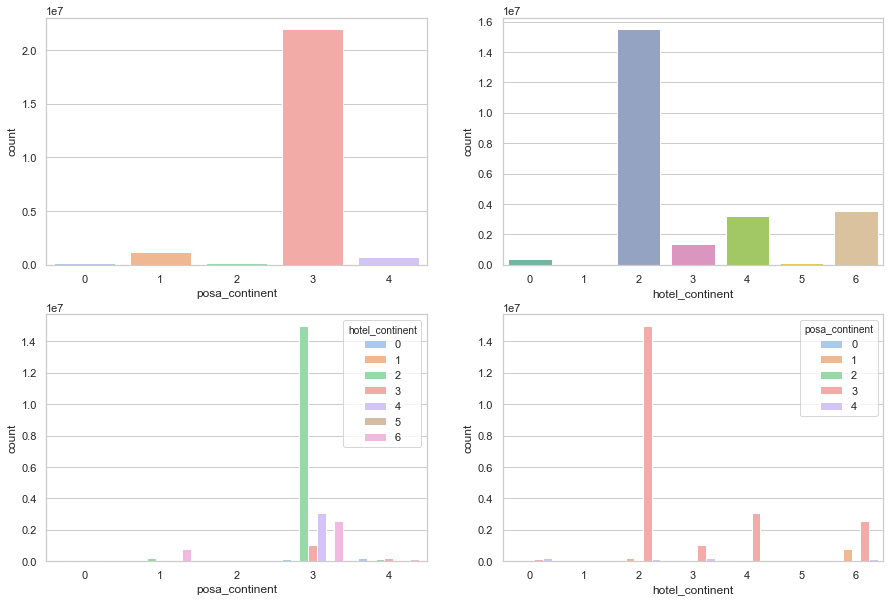

In [6]:
fig, ((axis1,axis2),(axis3,axis4)) = plt.subplots(2,2,figsize=(15,10))

sns.countplot('posa_continent', data=train_data,ax=axis1)
sns.countplot('hotel_continent', data=train_data,palette="Set2",ax=axis2)
sns.countplot('posa_continent', hue='hotel_continent',data=train_data,ax=axis3)
sns.countplot('hotel_continent', hue='posa_continent', data=train_data,ax=axis4)

plt.savefig('plots/booked_user_location_country.jpg')

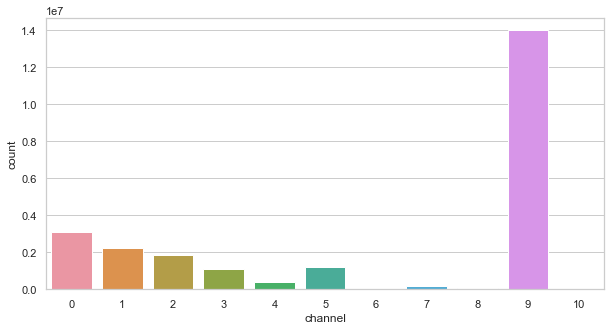

In [7]:
plt.figure(figsize=(10,5))

sns.countplot(x='channel', data=train_data)

plt.savefig('plots/channel_count.jpg')

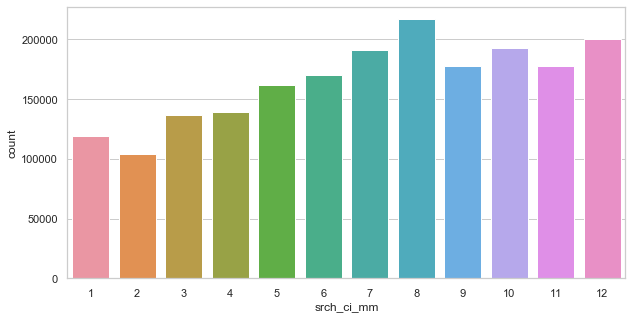

In [8]:
plt.figure(figsize=(10,5))

sns.countplot('srch_ci_mm',data=train_data[train_data["is_booking"] == 1])

plt.savefig('plots/srch_ci_mm_count.jpg')

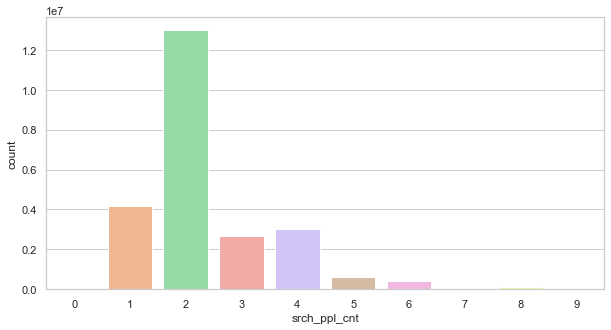

In [9]:
plt.figure(figsize=(10,5))

sns.countplot(x='srch_ppl_cnt', order=list(range(0,10)), data=train_data)

plt.savefig('plots/srch_ppl_cnt_count.jpg')

In [10]:
train = pd.read_csv('data/train.csv', delimiter=',')

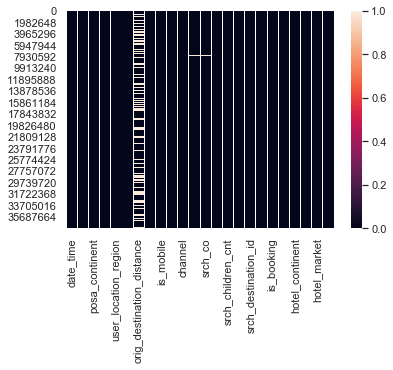

In [11]:
sns.heatmap(train.isnull())
plt.savefig("plots/nan_columns_train.jpg", bbox_inches="tight")

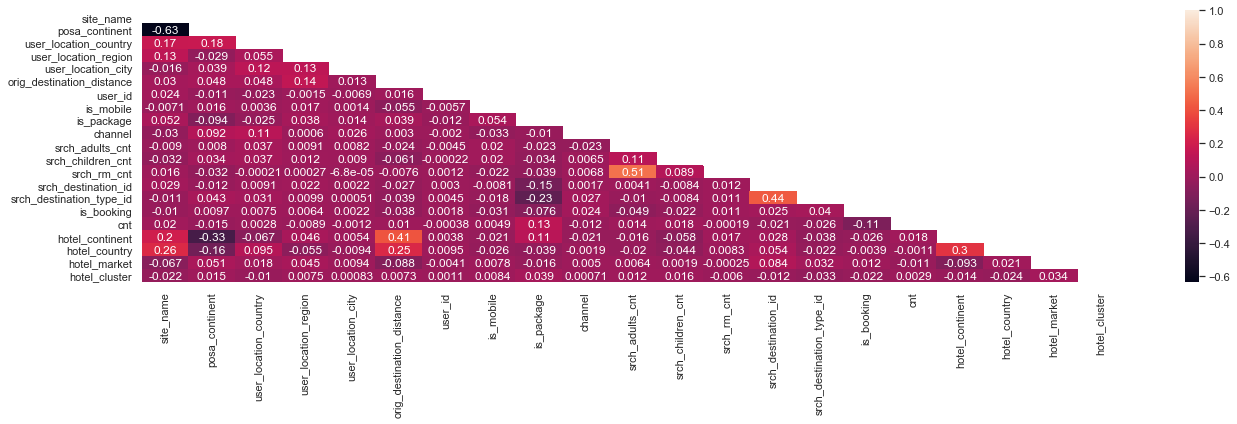

In [12]:
mask = np.zeros_like(train.corr(),dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(22,5))
sns.heatmap(train.corr(), annot=True, mask=mask)

plt.savefig('plots/corr.jpg')